# LSTM -2020

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')


PAST_N_DAYS = 252
STOCK_SYMBOL = 'CABO'


TEST_START = '2020-01-01'
TEST_END = '2020-11-13'

In [2]:
# Get stock data
df = web.DataReader(STOCK_SYMBOL, data_source='yahoo', start='2012-01-01', end=TEST_END) 
#Show the data 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-11,405.000000,399.839996,400.000000,399.839996,8200.0,381.901093
2015-06-12,395.000000,376.910004,395.000000,376.910004,500.0,359.999847
2015-06-15,376.910004,376.910004,376.910004,376.910004,200.0,359.999847
2015-06-16,376.910004,376.910004,376.910004,376.910004,0.0,359.999847
2015-06-17,396.709991,393.200012,393.200012,395.000000,31400.0,377.278229


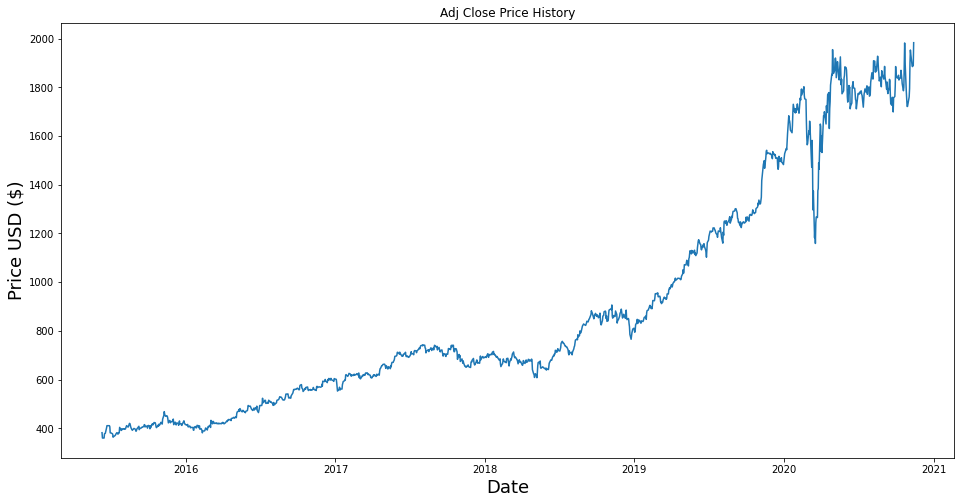

In [3]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-11,405.000000,399.839996,400.000000,399.839996,8200.0,381.901093
2015-06-12,395.000000,376.910004,395.000000,376.910004,500.0,359.999847
2015-06-15,376.910004,376.910004,376.910004,376.910004,200.0,359.999847
2015-06-16,376.910004,376.910004,376.910004,376.910004,0.0,359.999847
2015-06-17,396.709991,393.200012,393.200012,395.000000,31400.0,377.278229


In [5]:
train_df = df[:'2018-12-31']
test_df = df['2020-01-01':]
train_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,796.510010,774.099976,789.570007,774.099976,9500.0,765.567688
2018-12-26,806.229980,767.150024,774.729980,800.989990,56200.0,792.161316
2018-12-27,808.825012,777.340027,792.010010,807.919983,43500.0,799.014954
2018-12-28,819.000000,801.200012,810.690002,816.429993,21900.0,807.431152
2018-12-31,822.020020,805.989990,819.989990,820.099976,25900.0,811.060669


In [6]:
test_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-09,1997.270020,1880.380005,1996.670044,1891.989990,28400.0,1891.989990
2020-11-10,1927.099976,1860.000000,1897.000000,1885.219971,41900.0,1885.219971
2020-11-11,1911.400024,1880.099976,1891.199951,1893.390015,20300.0,1893.390015
2020-11-12,1910.099976,1870.640015,1890.550049,1889.410034,37500.0,1889.410034
2020-11-13,1984.109985,1909.000000,1909.000000,1983.469971,34300.0,1983.469971


Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

### Prepare traiing data for modeling

In [7]:
#Create a new dataframe with only the 'Close' column
data = train_df.filter(['Adj Close'])
#Converting the dataframe to a numpy array
dataset = data.values

In [8]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Adj Close'])
# Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.8) 
training_data_len = len(dataset) - 252

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(PAST_N_DAYS,len(train_data)):
    x_train.append(train_data[i-PAST_N_DAYS:i,0])
    y_train.append(train_data[i,0])

In [11]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
# Stacked LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))

model.add(Dense(units=1))  

In [14]:
# BiLSTM
# from keras.layers import Bidirectional

# model = Sequential()
# model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1],1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 252, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 252, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 252, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 252, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 252, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 252, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [16]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)

In [17]:
#Train the model
history = model.fit(x_train, y_train, batch_size=25, epochs=10, callbacks=[es])

Epoch 1/10
35/35 [==============================] - 7s 211ms/step - loss: 0.0104
Epoch 2/10
35/35 [==============================] - 9s 263ms/step - loss: 0.0014
Epoch 3/10
35/35 [==============================] - 9s 259ms/step - loss: 0.0012
Epoch 4/10
35/35 [==============================] - 10s 283ms/step - loss: 0.0011
Epoch 5/10
35/35 [==============================] - 9s 264ms/step - loss: 0.0010
Epoch 6/10
35/35 [==============================] - 9s 263ms/step - loss: 8.6964e-04
Epoch 7/10
35/35 [==============================] - 9s 253ms/step - loss: 0.0012
Epoch 8/10
35/35 [==============================] - 9s 265ms/step - loss: 0.0010
Epoch 9/10
35/35 [==============================] - 9s 253ms/step - loss: 7.0608e-04
Epoch 10/10
35/35 [==============================] - 9s 261ms/step - loss: 6.3417e-04


### Test Data

In [18]:
#Test data set
test_data = scaled_data[training_data_len - PAST_N_DAYS: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(PAST_N_DAYS,len(test_data)):
    x_test.append(test_data[i-PAST_N_DAYS:i,0])

In [19]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [20]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

### Prediction

In [21]:
# Getting the models predicted price values
predictions = model.predict(x_test) 
# Undo scaling
predictions = scaler.inverse_transform(predictions)

### Evaluate

In [22]:
# Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

129.45694806953964

### Visualize

/home/karma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


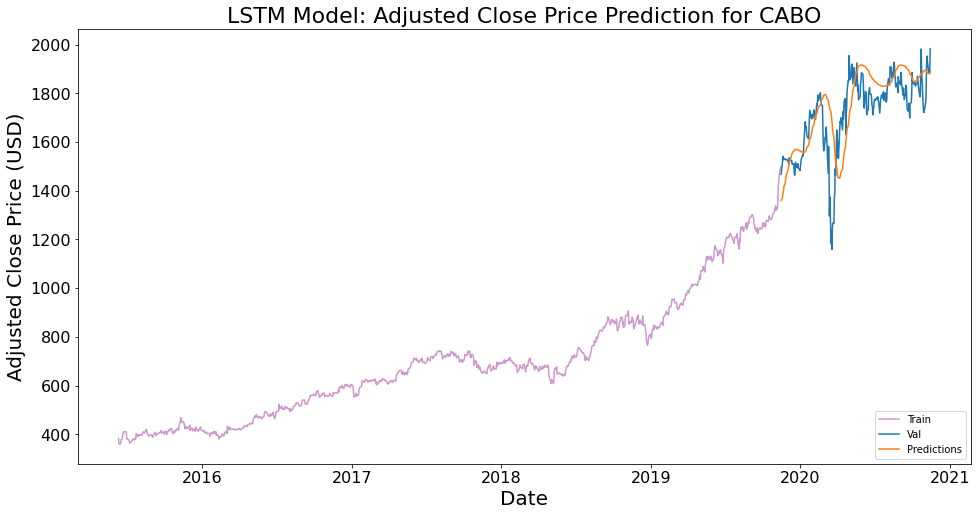

In [23]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title(f'LSTM Model: Adjusted Close Price Prediction for {STOCK_SYMBOL}', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Adjusted Close Price (USD)', fontsize=20)
plt.plot(train['Adj Close'], alpha = 0.4, color='#800080')

plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

/home/karma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


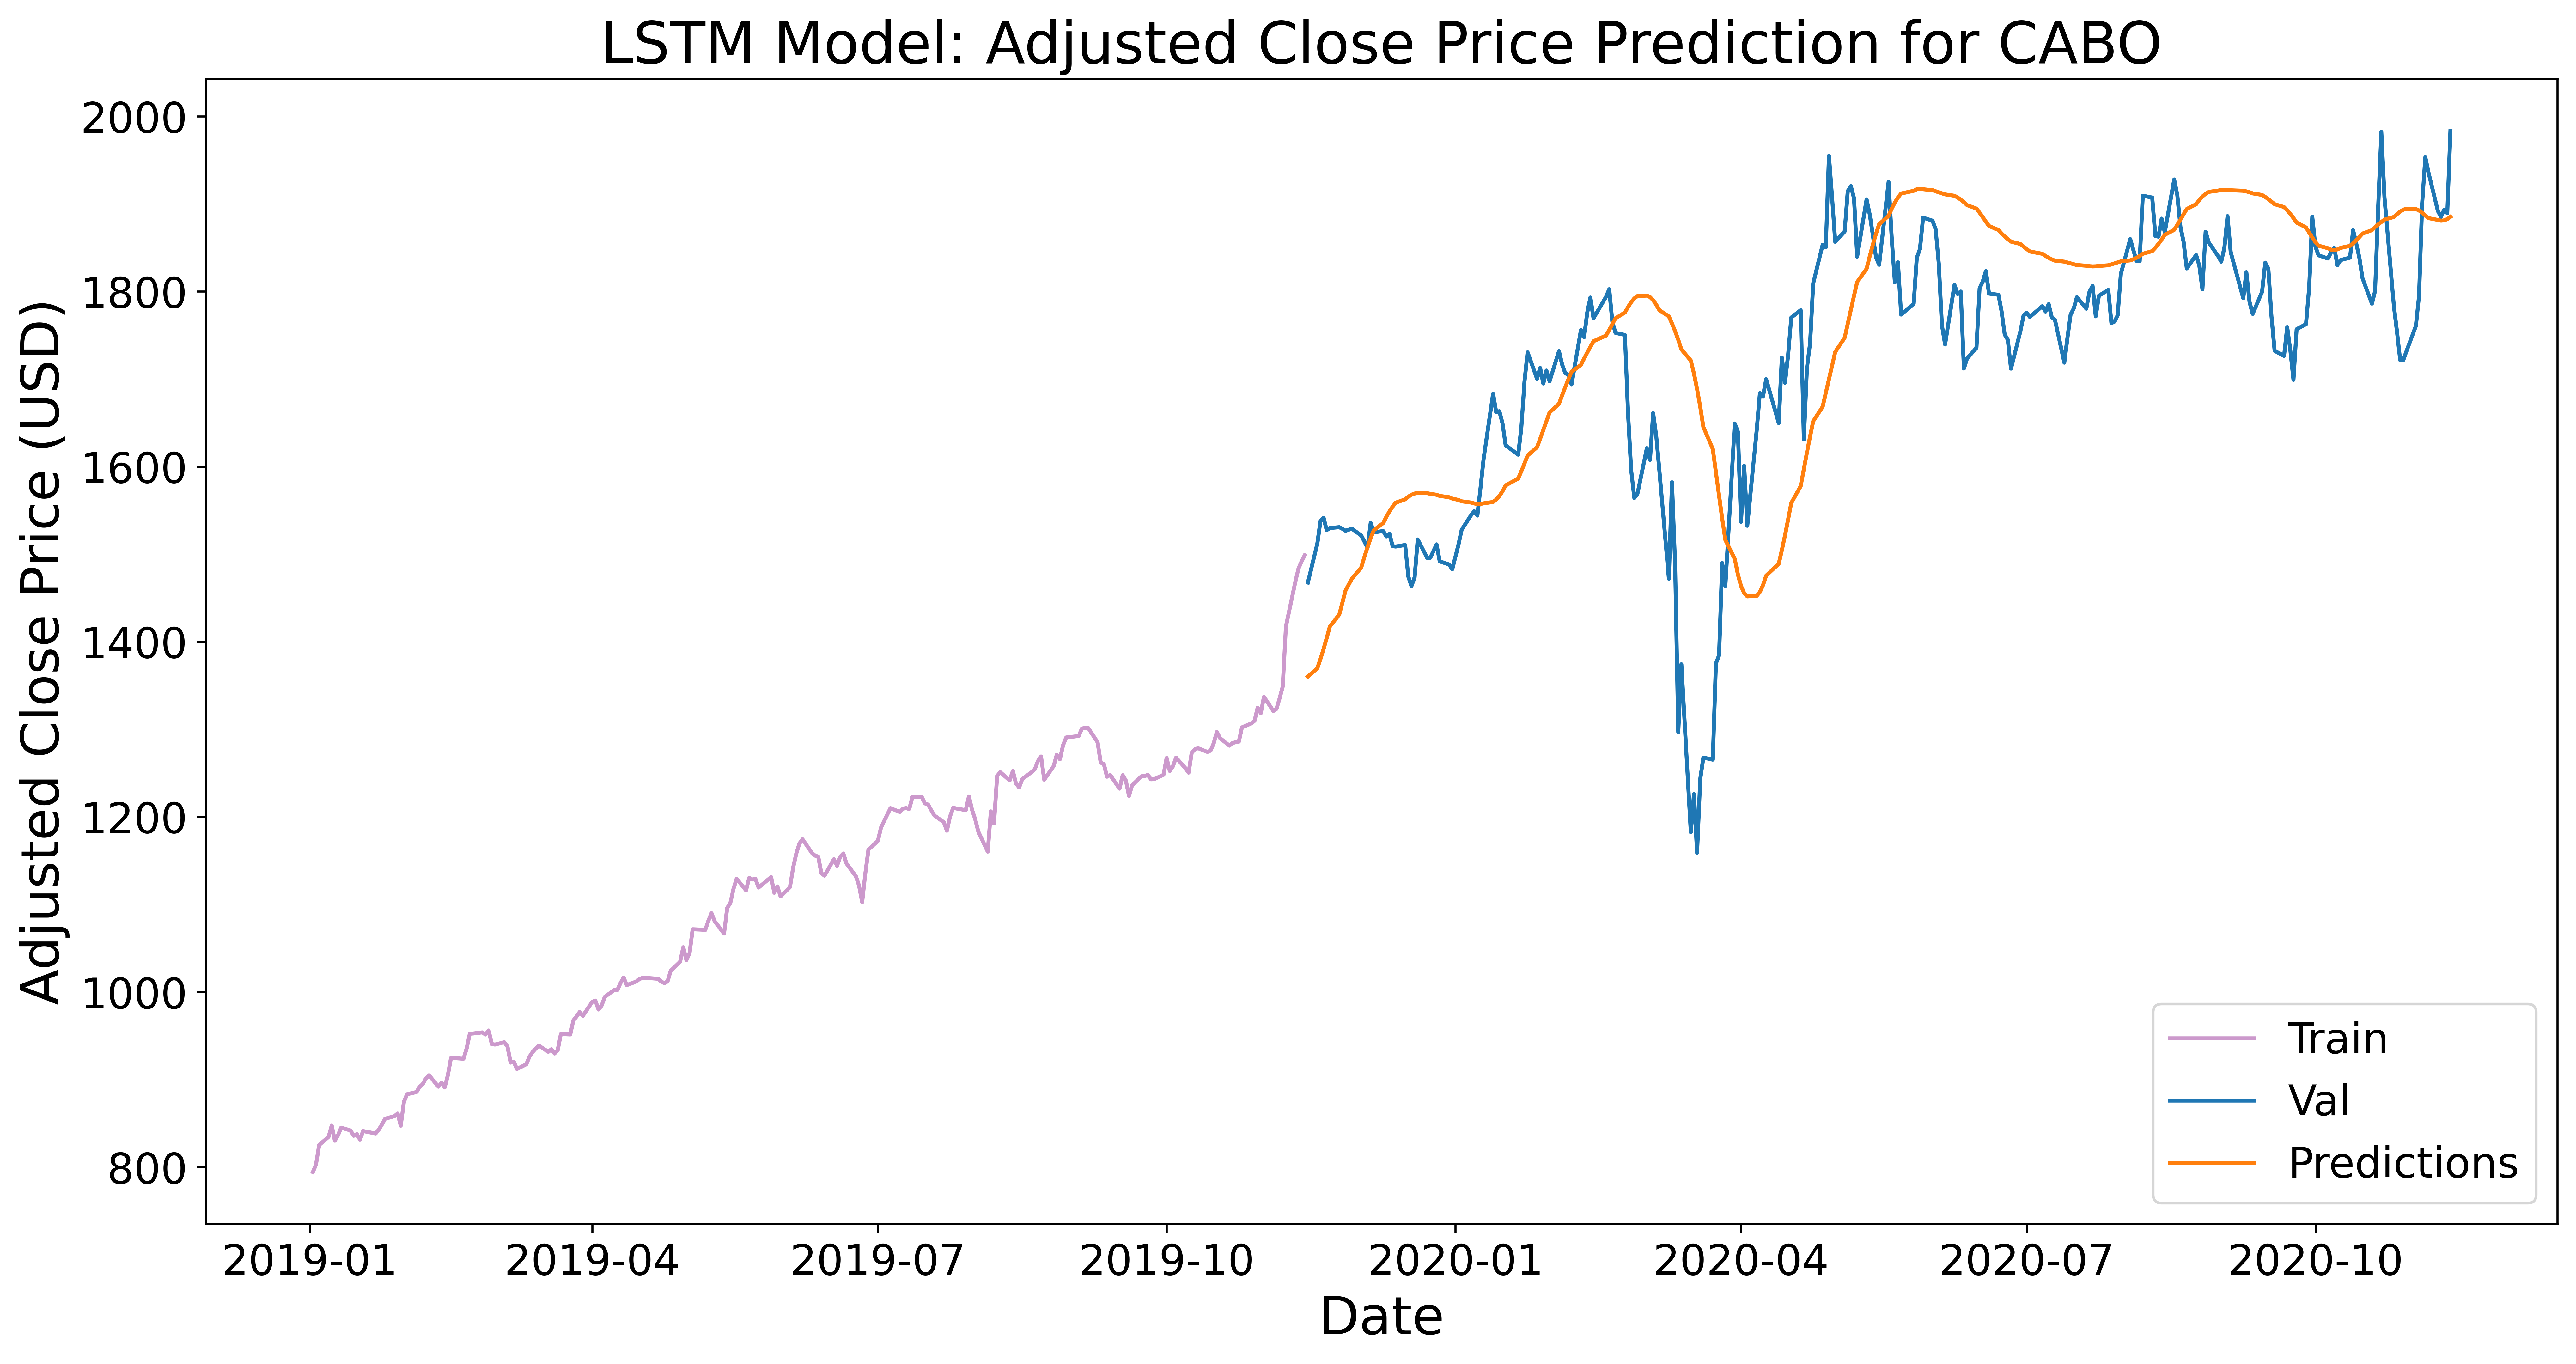

In [24]:
# Close up graph

train = data[:training_data_len]
train = train['2019-01-01':TEST_START]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8), dpi=600)
plt.title(f'LSTM Model: Adjusted Close Price Prediction for {STOCK_SYMBOL}', fontsize=22)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Adjusted Close Price (USD)', fontsize=20)
plt.plot(train['Adj Close'], alpha = 0.4, color='#800080')

plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=16)

plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)

plt.show()